In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generating graph using networkx library

In [54]:
# Function to create a random graph
def create_random_graph(num_nodes, max_edge_weight, max_degree):
    G = nx.Graph()
    nodes = [int(0 + i) for i in range(num_nodes)]  # Generate node labels from 0, 1, 2, ...
    G.add_nodes_from(nodes)

    # Ensure the graph is connected
    for i in range(1, num_nodes):
        # Add at least one edge to connect each node to the graph
        G.add_edge(nodes[i-1], nodes[i], weight=random.randint(1, max_edge_weight))

    # Add random edges
    additional_edges = random.randint(num_nodes, num_nodes * max_degree // 2)  # total edges
    while G.number_of_edges() < additional_edges:
        a, b = random.sample(nodes, 2)
        if not G.has_edge(a, b):
            G.add_edge(a, b, weight=random.randint(1, max_edge_weight))

    return G

In [55]:
G = create_random_graph(10, 20, 4)

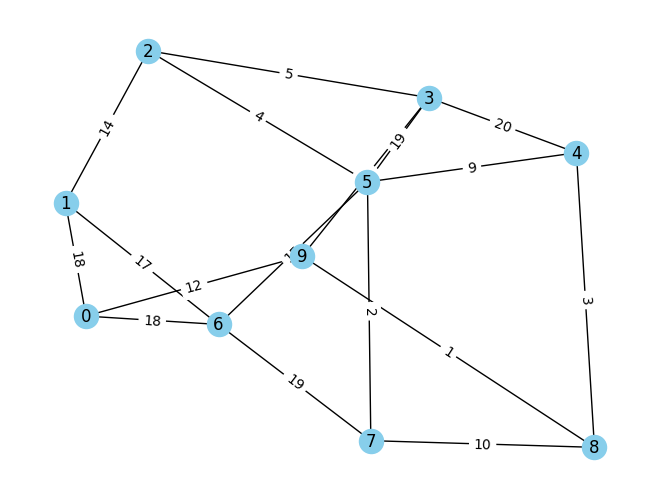

In [56]:
# Visualization
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# Genatic Algorithm
### Fitness Function: total distance of the tour
### Selection: picks the next generation
### Crossover: ordered crossover
### Mutation: randomly swap 2 cities
### Hall of Fame: keeps track of best solution

In [57]:
from deap import base, creator, tools, algorithms
import numpy as np

In [58]:
def tsp_fitness(individual, graph):
    weight = 0
    penalty = 100  # A large penalty for missing edges
    for i in range(1, len(individual)):
        try:
            weight += graph[individual[i-1]][individual[i]]['weight']
        except KeyError:
            weight += penalty
    # Close the tour by returning to the starting node
    try:
        weight += graph[individual[-1]][individual[0]]['weight']
    except KeyError:
        weight += penalty
    return (weight,)


In [60]:
def setup_ga_tsp(graph, population_size=50, crossover_prob=0.7, mutation_prob=0.2, n_generations=100):
    """
    Set up and execute a genetic algorithm for the Traveling Salesman Problem.
    
    Args:
        graph: Networkx graph representing cities and distances.
        population_size: Size of the population.
        crossover_prob: Probability with which two individuals cross over.
        mutation_prob: Probability with which an individual mutates.
        n_generations: Number of generations to run the GA.
        
    Returns:
        The best path found as a list of node indices.
    """
    toolbox = base.Toolbox()
    nodes = list(graph.nodes())

    # Attribute generator
    toolbox.register("indices", random.sample, nodes, len(nodes))

    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutation_prob)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", tsp_fitness, graph=graph)

    # Create initial population and apply GA
    population = toolbox.population(n=population_size)
    hall_of_fame = tools.HallOfFame(1)  # Store the best individual

    # Setup statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Run genetic algorithm
    algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=n_generations, stats=stats, halloffame=hall_of_fame, verbose=True)

    return hall_of_fame[0]

# Example usage (assuming a pre-defined 'graph'):
# best_path = setup_ga_tsp(graph)

In [61]:
def visualize_tsp_solution(graph, tour):
    pos = nx.spring_layout(graph)  # positions for all nodes using a layout strategy
    
    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

    # Highlight the tour
    tour_edges = [(tour[i], tour[(i + 1) % len(tour)]) for i in range(len(tour))]
    nx.draw_networkx_nodes(graph, pos, nodelist=tour, node_color='blue', node_size=500)
    nx.draw_networkx_edges(graph, pos, edgelist=tour_edges, edge_color='red', width=2)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.title("TSP Solution Visualization")
    plt.show()

In [62]:
# Parameters
population_size = 10
crossover_prob = 0.7
mutation_prob = 0.2
n_generations = 10

In [63]:
# G = create_random_graph(num_nodes, max_weight, max_degree)

In [64]:
# Apply GA
best_tour = setup_ga_tsp(G, population_size, crossover_prob, mutation_prob, n_generations)
print("Best tour:", best_tour)
print("Best tour length:", tsp_fitness(best_tour, G)[0])
print("penalty of missing edges: ", tsp_fitness(best_tour, G)[0] - G.size("weight"))

gen	nevals	avg  	min	max
0  	10    	664.3	560	835
1  	8     	633.7	557	721
2  	8     	639.5	357	909
3  	10    	581.4	379	823
4  	8     	494.7	288	747
5  	8     	397.7	278	654
6  	5     	384.5	278	653
7  	6     	374.4	278	744
8  	10    	366.1	278	458
9  	8     	385.1	278	730
10 	7     	378.6	278	545
Best tour: [6, 9, 3, 2, 1, 0, 4, 8, 7, 5]
Best tour length: 278
penalty of missing edges:  81.0


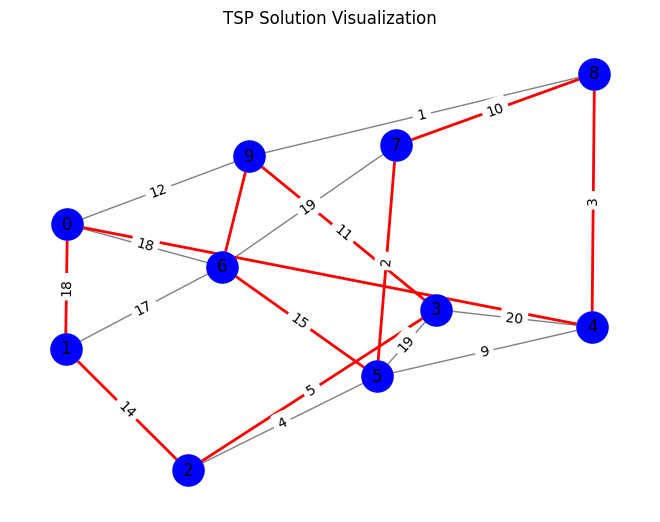

In [65]:
visualize_tsp_solution(G, best_tour)